In [25]:
# try notebook
print('hii')

hii


In [26]:
import pandas as pd
import geopandas

In [27]:
#read the data
df1 = pd.read_csv("ISP.csv")
#delete the invalid data
df2 = df1[df1.MaxCIRDown >= 16]
df3 = df1[df1.MaxCIRUp >= 16]
#sort
value_count = df3['Neighborhood'].value_counts()
df4 = value_count.rename_axis('Neighborhood').to_frame('count')
df4.head(20)

,count
Neighborhood,
Central Business District,410
South Side Flats,200
Strip District,149
North Shore,120
Shadyside,106
Bloomfield,101
Bluff,92
North Oakland,90
Lower Lawrenceville,81


<AxesSubplot:>

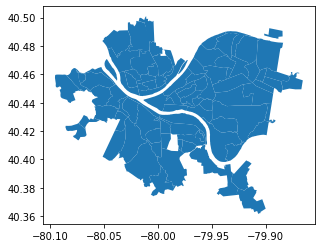

In [28]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

<AxesSubplot:>

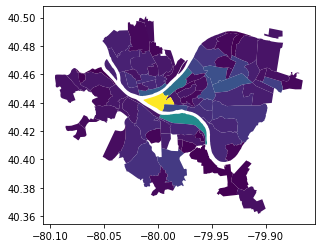

In [29]:
# do the merge
ISP_map = neighborhoods.merge(df4, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
# steps_map[['hood','number_of_steps','geometry']].head()
# draw a choropleth map using data from the column named "number_of_steps"
ISP_map.plot(column='count')

<AxesSubplot:>

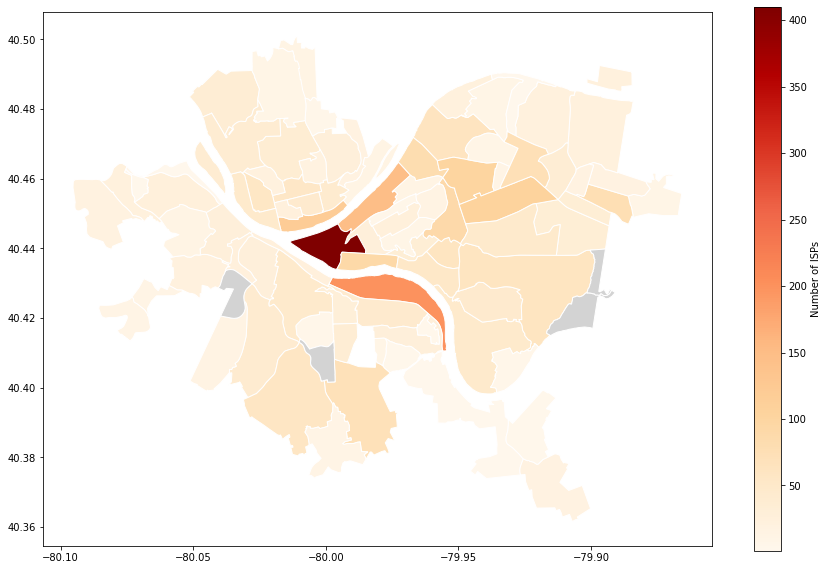

In [30]:
ISP_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of ISPs"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )